
# Deep Learning for Image Classification Assessment
# SOLUTION


## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [23]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [25]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [26]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

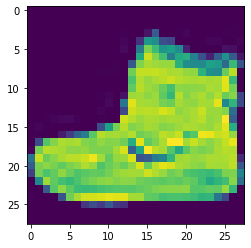

In [27]:
plt.imshow(x_train[0])

In [28]:
y_train[0]

9

In [29]:
classes[9]

'Ankle boot'

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [30]:
x_train.max()

255

In [31]:
x_train = x_train/255

In [32]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [35]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [36]:
from tensorflow.keras.utils import to_categorical

In [37]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
y_cat_train = to_categorical(y_train)

In [39]:
y_cat_test = to_categorical(y_test)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [41]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3)

In [44]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 189s 100ms/step - loss: 0.4230 - accuracy: 0.8553 - val_loss: 0.3235 - val_accuracy: 0.8876
Epoch 2/10
1875/1875 [==============================] - 183s 98ms/step - loss: 0.3038 - accuracy: 0.8967 - val_loss: 0.3021 - val_accuracy: 0.8935
Epoch 3/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.2867 - accuracy: 0.9012 - val_loss: 0.3290 - val_accuracy: 0.8902
Epoch 4/10
1875/1875 [==============================] - 183s 98ms/step - loss: 0.2817 - accuracy: 0.9035 - val_loss: 0.3170 - val_accuracy: 0.8946
Epoch 5/10
1875/1875 [==============================] - 183s 98ms/step - loss: 0.2803 - accuracy: 0.9053 - val_loss: 0.2998 - val_accuracy: 0.8988
Epoch 6/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.2768 - accuracy: 0.9063 - val_loss: 0.3492 - val_accuracy: 0.8828
Epoch 7/10
1875/1875 [==============================] - 166s 89ms/step - loss: 0.2763 - accuracy: 0.9064 - val_loss:

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.423028,0.855283,0.323529,0.8876
1,0.303836,0.896667,0.302108,0.8935
2,0.286687,0.901217,0.329011,0.8902
3,0.281705,0.903467,0.316995,0.8946
4,0.280286,0.905283,0.299813,0.8988


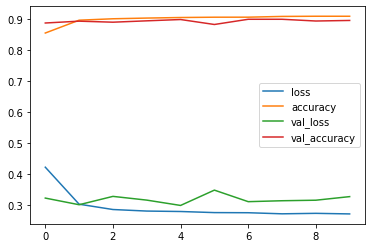

In [46]:
loss_df.plot();

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3282 - accuracy: 0.8958


[0.32824668288230896, 0.895799994468689]

In [49]:
from sklearn.metrics import classification_report

In [50]:
predictions = model.predict(x_test)
predictions

array([[2.47183459e-12, 1.12131619e-17, 2.13072563e-11, ...,
        7.68888349e-05, 1.31983144e-08, 9.99918342e-01],
       [1.15284262e-08, 8.70162399e-22, 1.00000000e+00, ...,
        3.25391582e-15, 2.48512690e-12, 1.37303369e-18],
       [6.92599977e-10, 1.00000000e+00, 6.97385197e-14, ...,
        1.22530101e-14, 1.80726503e-10, 2.85596905e-16],
       ...,
       [2.54607779e-09, 3.21797074e-29, 1.04251324e-13, ...,
        1.41656546e-16, 9.99999762e-01, 4.84618044e-20],
       [1.38804843e-10, 1.00000000e+00, 8.37457816e-14, ...,
        4.00217096e-15, 6.60672697e-11, 9.21464591e-16],
       [6.74228242e-04, 2.11826282e-05, 4.26417217e-03, ...,
        1.57749653e-01, 9.46956575e-02, 5.88189811e-03]], dtype=float32)

In [51]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [52]:
y_cat_test.shape

(10000, 10)

In [53]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [54]:
np.argmax(predictions[0])

9

In [55]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [56]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.80      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.78      0.89      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.67      0.70      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Prediction

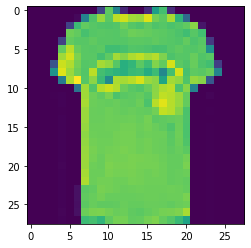

In [81]:
plt.imshow(x_test[19])

In [82]:
#samples=[x_test[19],x_test[15],x_test[12],x_test[14]]

In [83]:
img=x_test[19]
img.shape

(28, 28, 1)

In [84]:
type(img)

numpy.ndarray

In [85]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [86]:
#re_sample=samples.reshape(4,28,28,1)

In [87]:
model.predict(resized_img)

array([[9.9511397e-01, 2.5460239e-10, 1.3561636e-06, 3.8199873e-06,
        9.5296382e-10, 4.8907763e-11, 4.8807436e-03, 1.5390492e-13,
        1.6114141e-07, 6.0610539e-15]], dtype=float32)

In [88]:
np.argmax(model.predict(resized_img))

0

In [89]:
from tensorflow.keras.models import load_model

In [90]:
emir=load_model("76.1.Assignment-2.h5")

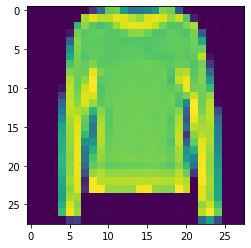

In [91]:
plt.imshow(x_test[99])

In [92]:
img=x_test[99]
img.shape

(28, 28, 1)

In [93]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [94]:
emir.predict(resized_img)

array([[2.3107928e-05, 7.7685493e-13, 9.6985751e-01, 7.0181256e-09,
        5.5831461e-04, 1.3835617e-10, 2.9560843e-02, 2.4320967e-10,
        1.9876345e-09, 2.0176478e-07]], dtype=float32)

In [95]:
result=emir.predict(resized_img)

In [96]:
np.argmax(result)

2

In [97]:
classes[2]

'Pullover'